In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from itertools import product as product
%matplotlib notebook

In [33]:
N = 1000
I_0 = 1
S_0 = N - I_0
Rsi = 0.02/N

# SI Model transition rates
Q = np.zeros((N + 1, N + 1))

## For this model, when total - i = 0, i.e. there are no infectives then
## the rate of going anywhere is 0
for i in range(1, N): # Start at population 1 and only go up to total - 1
    Q[i, i] = - Rsi * i * (N - i)
    Q[i, i - 1] = Rsi * i * (N - i)

In [34]:
# Q matrix for when we are observing social distancing

DistQ = np.zeros((N + 1, N + 1))
c = 0.1
## For this model, when total - i = 0, i.e. there are no infectives then
## the rate of going anywhere is 0
for i in range(1, N): # Start at population 1 and only go up to total - 1
    DistQ[i, i] = - Rsi * i * (N - i) * c
    DistQ[i, i - 1] = Rsi * i * (N - i) * c

<IPython.core.display.Javascript object>


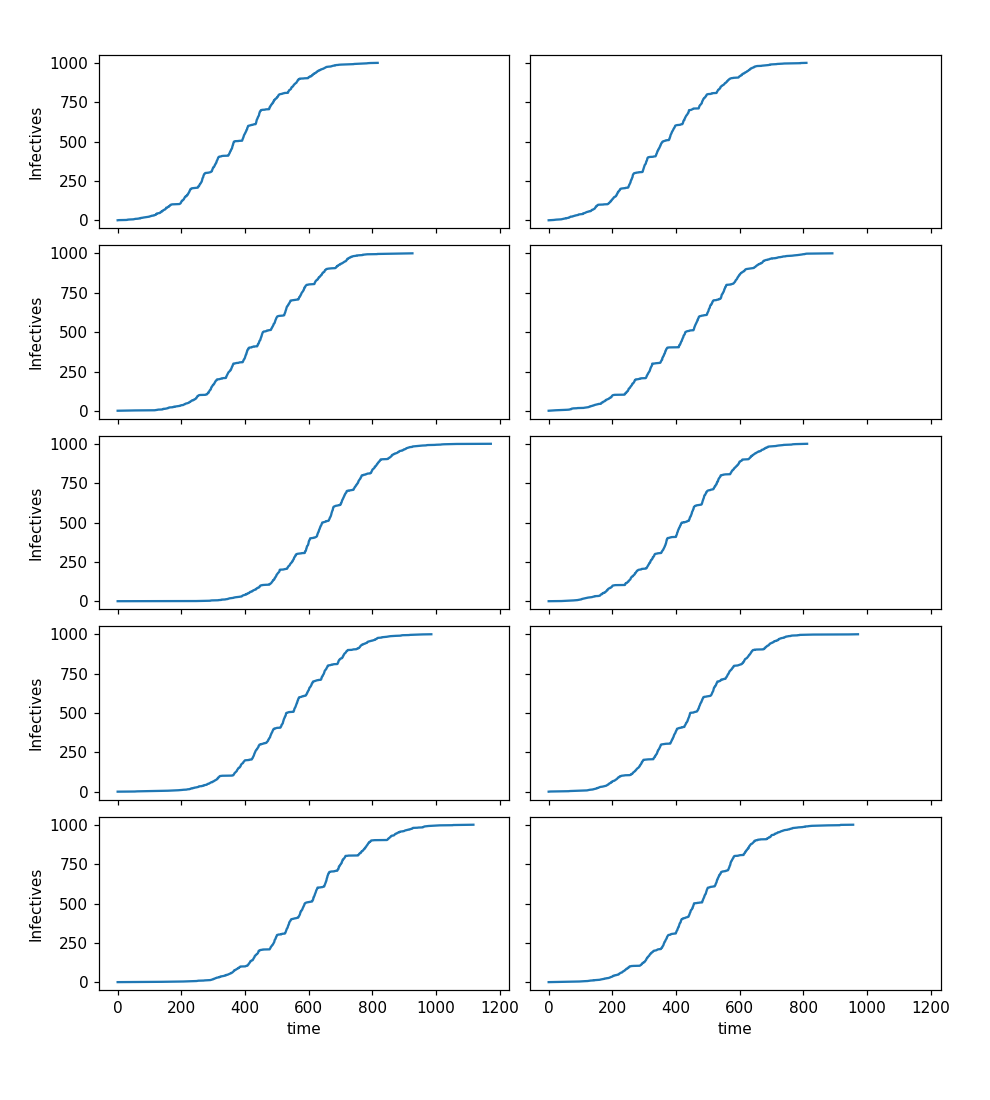

In [35]:
def getTrajectories(S_0, Q, I_0, DistQ, N):
    I_t = [[0, I_0]]
    
    # Old population to which we compare to check if number of infectives 
    # has increased by 100
    old = S_0
    lastTime = 0
    state = S_0
    timeSpent = np.random.exponential(scale=1/(- np.diag(Q)[state]))
    state -= 1 # will only transition to a state with a lower number of susceptibles
    I_t.append([I_t[-1][0] + timeSpent, N - state])
    socDist = False

    while state != 0:
        if socDist:
            #print("Social Distancing")
            timeSpent = np.random.exponential(scale=1/(- np.diag(DistQ)[state]))
            state -= 1 # Will only transition to a state with a lower number of susceptibles
            I_t.append([I_t[-1][0] + timeSpent, N - state])
            if I_t[-1][0] - lastTime >= 20:
                I_t[-1][0] = lastTime + 20 + timeSpent
                socDist = False
                old = state # Remember the population now that we have stopped social distancing
        else:
            #print("No Social Distancing")
            timeSpent = np.random.exponential(scale=1/(- np.diag(Q)[state]))
            state -= 1 # will only transition to a state with a lower number of susceptibles
            I_t.append([I_t[-1][0] + timeSpent, N - state])
            if (N - state) % 100 == 0:
                socDist = True
                lastTime = I_t[-1][0] # Remember when we began social distancing

    return zip(*I_t)

fig, axes = plt.subplots(ncols=2, nrows=5, sharex=True, figsize=(9, 10), sharey=True)

for row, col in product(range(5), range(2)):
    times, infectives = getTrajectories(S_0, Q, I_0, DistQ, N)
    axes[row, col].plot(times, infectives)
    if col == 0:
        axes[row, col].set_ylabel("Infectives")
    if row == 4:
        axes[row, col].set_xlabel("time")

plt.subplots_adjust(bottom=0.1, top=0.95, hspace=0.1, wspace=0.05, left=0.1, right=0.95)
plt.show()